In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler



In [2]:
# Load the census income dataset
data = pd.read_csv('census_income.csv')
# Assuming the dataset has columns/features a, b, c, etc.
# Adjust the column names accordingly in the code below

# Perform data preprocessing
# Drop any missing values
data.dropna(inplace=True)
# Normalize the feature values using StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[['age', 'education.num', 'hours.per.week']])


In [3]:
# Determine the optimal number of clusters using the elbow method
# Calculate the sum of squared distances for different values of k (within-cluster sum of squares)
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)



D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` w

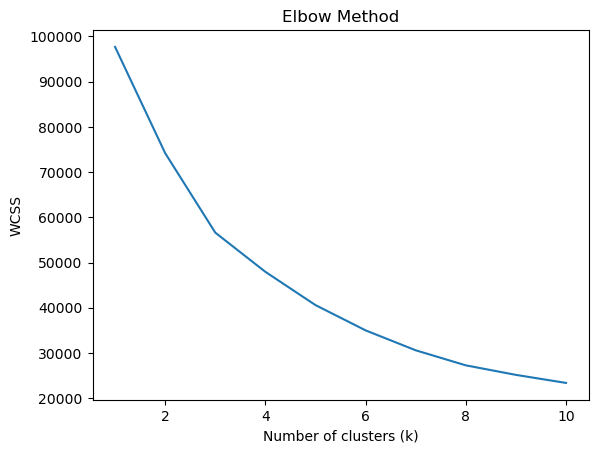

In [4]:
# Plot the within-cluster sum of squares (WCSS) against the number of clusters (k)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.show()


In [5]:
# Perform k-means clustering with the selected number of clusters (k)
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans.fit(scaled_data)

# Extract the cluster labels for each data point
labels = kmeans.labels_

# Print the cluster labels for each data point
print(labels)

# Additionally, you can store the cluster labels back into the DataFrame
data['Cluster'] = labels

# Display the updated DataFrame with the cluster assignments
print(data.head())


D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[1 2 1 ... 1 2 1]
   age          workclass  fnlwgt   education  education.num  \
0   50   Self-emp-not-inc   83311   Bachelors             13   
1   38            Private  215646     HS-grad              9   
2   53            Private  234721        11th              7   
3   28            Private  338409   Bachelors             13   
4   37            Private  284582     Masters             14   

        marital,status          occupation    relationship    race      sex  \
0   Married-civ-spouse     Exec-managerial         Husband   White     Male   
1             Divorced   Handlers-cleaners   Not-in-family   White     Male   
2   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
3   Married-civ-spouse      Prof-specialty            Wife   Black   Female   
4   Married-civ-spouse     Exec-managerial            Wife   White   Female   

   capital.gain  capital.loss  hours.per.week  native.country  income  Cluster  
0             0             0            

In [6]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(scaled_data, labels)
print(silhouette_avg)

0.2933176151344974
